In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Data Cleaning**

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# split and create new column
df['duration_minutes'] = pd.to_numeric(df['duration'].str.extract(r'(\d+) min')[0]).astype('Int64')
df['seasons'] = pd.to_numeric(df['duration'].str.extract(r'(\d+) Season')[0]).astype('Int64')

In [8]:
# drop column
df.drop(columns=['duration'],inplace=True)

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,<NA>
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",<NA>,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,<NA>,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",<NA>,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,<NA>,2


In [10]:
# fill missing value
df['director'] = df['director'].fillna('unknown')
df['cast'] = df['cast'].fillna('unknown')
df['country'] = df['country'].fillna('unknown')
df['rating'] = df['rating'].fillna('unknown')
df['duration_minutes'] = df['duration_minutes'].fillna(0)
df['seasons'] = df['seasons'].fillna(0)
df['date_added'] = df['date_added'].fillna(0)  


In [11]:
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
listed_in           0
description         0
duration_minutes    0
seasons             0
dtype: int64

In [12]:
df.dtypes

show_id             object
type                object
title               object
director            object
cast                object
country             object
date_added          object
release_year         int64
rating              object
listed_in           object
description         object
duration_minutes     Int64
seasons              Int64
dtype: object

In [13]:
# changing data types

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')

In [14]:
df.dtypes

show_id                     object
type                      category
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                    category
listed_in                   object
description                 object
duration_minutes             Int64
seasons                      Int64
dtype: object

# Data Analysis

***1. Count of Movies vs TV Shows***

In [15]:
movie_count = df[df["type"] == "Movie"].shape[0]
tv_show_count = df[df["type"] == "TV Show"].shape[0]
print("Movies:", movie_count, "TV Shows:", tv_show_count)

Movies: 6131 TV Shows: 2676


***2. Most common rating***

In [16]:
common_rating = df['rating'].value_counts().idxmax()
print(f'Most Common Rating: {common_rating}')

Most Common Rating: TV-MA


***3. Top 5 genres***

In [17]:
top_genres = df["listed_in"].str.split(", ").explode().value_counts().head(5)
print("Top 5 Genres: \n", top_genres)


Top 5 Genres: 
 listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


***4. Most frequently appearing director***

In [18]:
common_director = df[df["director"] != "Unknown"]["director"].value_counts().head(2)
print("Most Common Director:", common_director)

Most Common Director: director
unknown          2634
Rajiv Chilaka      19
Name: count, dtype: int64


***5. Titles added per year***

In [19]:
titles = df['date_added'].dt.year.value_counts().sort_index()
print(f'Titles added per year:\n {titles}')

Titles added per year:
 date_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


***6. Country with the most titles***

In [20]:
most_titles = df['country'].value_counts().idxmax()
print('Country with the Most Titles:', most_titles)

Country with the Most Titles: United States


***7. Top 5 most common actors***

In [21]:
common_actor = df['cast'].str.split(',').explode().value_counts().head(5)
print('Most Common Actor:\n',common_actor)

Most Common Actor:
 cast
unknown              825
 Anupam Kher          39
 Rupa Bhimani         31
 Takahiro Sakurai     30
 Julie Tejwani        28
Name: count, dtype: int64


***8. Average movie duration***

In [22]:
avg_duration = round(df['duration_minutes'].mean(),2)
print(f'Average Movie Duration: {avg_duration} Min')

Average Movie Duration: 69.29 Min


***9. Longest movie on Netflix***

In [23]:
longest_movie = df[df["duration_minutes"] == df["duration_minutes"].max()][["title", "duration_minutes"]]
print('Longest Movies on Netflix')
longest_movie

Longest Movies on Netflix


,title,duration_minutes
4253,Black Mirror: Bandersnatch,312


***10. Most number of seasons for TV shows***

In [24]:
most_seasons = df[df['seasons']== df['seasons'].max()][['title', 'seasons']]
print('Most Number of Season:\n',most_seasons)

Most Number of Season:
               title  seasons
548  Grey's Anatomy       17


***1️1. Distribution of content across different eras***

In [25]:
before_2000 = df[df["release_year"] < 2000].shape[0]
between_2000_2010 = df[(df["release_year"] >= 2000) & (df["release_year"] < 2010)].shape[0]
between_2010_2020 = df[(df["release_year"] >= 2010) & (df["release_year"] < 2020)].shape[0]
after_2020 = df[df["release_year"] >= 2020].shape[0]

content_distribution = {
    "Before 2000": before_2000,
    "2000-2010": between_2000_2010,
    "2010-2020": between_2010_2020,
    "2020 & Later": after_2020
}

for era, count in content_distribution.items():
    print(f"{era}: {count} titles")


Before 2000: 525 titles
2000-2010: 810 titles
2010-2020: 5927 titles
2020 & Later: 1545 titles


***12. Most recent title added to Netflix***

In [26]:
latest_added = df[df["date_added"] == df["date_added"].max()][["title", "date_added"]]
print("Most Recent Title Added:\n", latest_added)

Most Recent Title Added:
                   title date_added
0  Dick Johnson Is Dead 2021-09-25


***13. Number of TV shows with more than 3 seasons***

In [28]:
tv_more_than_3_seasons = df[df["seasons"] > 3].shape[0]
print(f"TV Shows with More Than 3 Seasons: {tv_more_than_3_seasons} Shows")

TV Shows with More Than 3 Seasons: 259 Shows


***14. Most common production country for Movies***

In [29]:
most_common_movie_country = df[df["type"] == "Movie"]["country"].value_counts().idxmax()
print("Most Common Production Country for Movies:", most_common_movie_country)


Most Common Production Country for Movies: United States


***15. Content release trend over time***

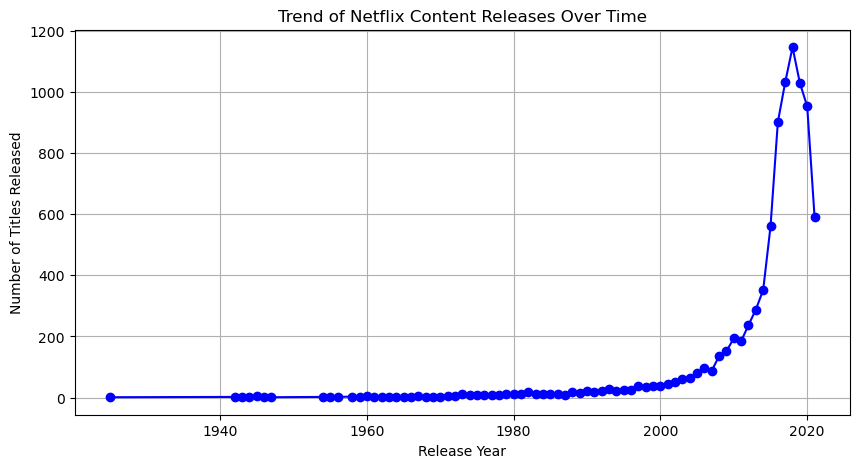

In [30]:
release_trend = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(release_trend.index, release_trend.values, marker="o", linestyle="-", color="b")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.title("Trend of Netflix Content Releases Over Time")
plt.grid(True)
plt.show()

***16. Movies vs Tv Shows***

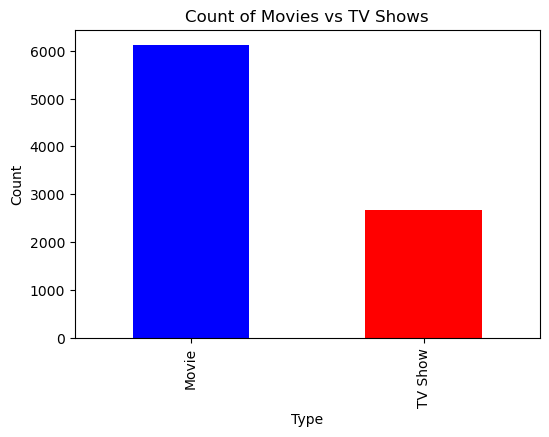

In [31]:
plt.figure(figsize=(6, 4))
df["type"].value_counts().plot(kind="bar", color=["blue", "red"])
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

***17.Titles Added Per Year***

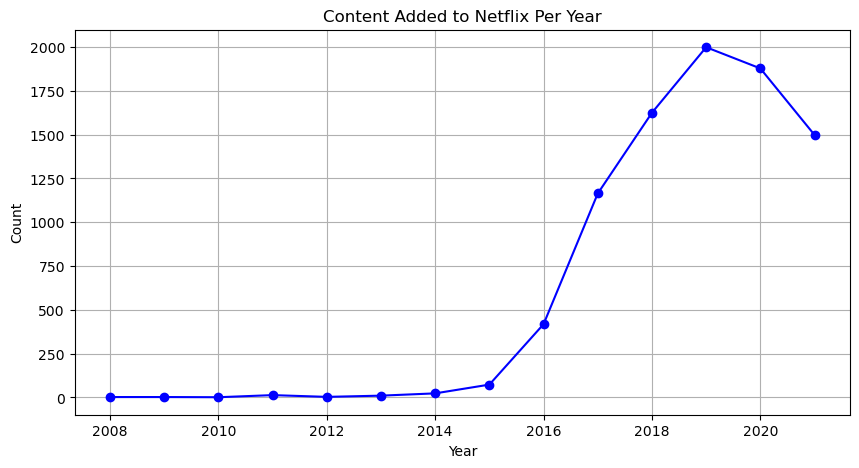

In [32]:
plt.figure(figsize=(10, 5))
df["date_added"].dt.year.value_counts().sort_index().plot(kind="line", marker="o", color="blue")
plt.title("Content Added to Netflix Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


***18.Top 5 Genres***

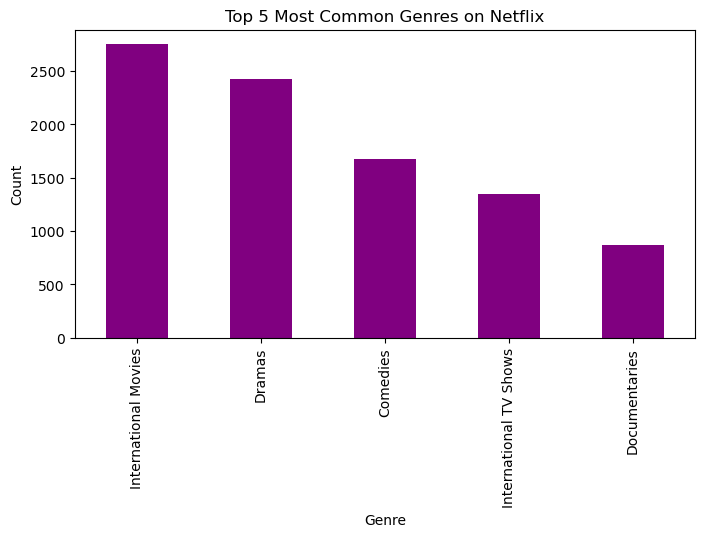

In [33]:
plt.figure(figsize=(8, 4))
top_genres.plot(kind="bar", color="purple")
plt.title("Top 5 Most Common Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

***19. Distribution of Movie Duration***

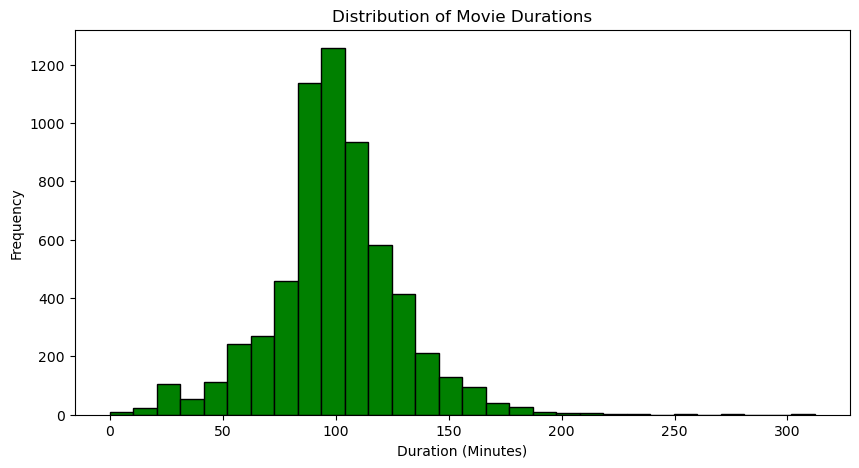

In [34]:
plt.figure(figsize=(10,5))
df[df["type"] == "Movie"]["duration_minutes"].plot(kind="hist", bins=30, color="green", edgecolor="black")
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

***20.Top 10 Countries with Most Titles***

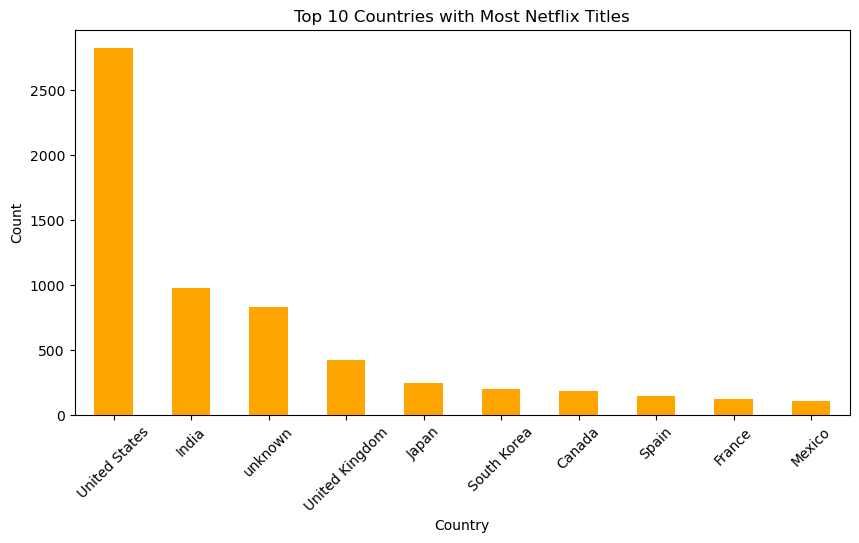

In [35]:
plt.figure(figsize=(10, 5))
df["country"].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
